In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [4]:
X = pd.read_csv('./CC GENERAL.csv')

In [5]:
X = X.drop('CUST_ID', axis=1)

In [6]:
X.ffill(inplace=True)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_normalized = normalize(X_scaled)

In [11]:
X_normalized_df = pd.DataFrame(X_normalized)

In [12]:
pca = PCA(n_components=2)
X_principle = pca.fit_transform(X_normalized_df)

In [17]:
X_principle = pd.DataFrame(X_principle)
X_principle.columns = ['P1', 'P2']

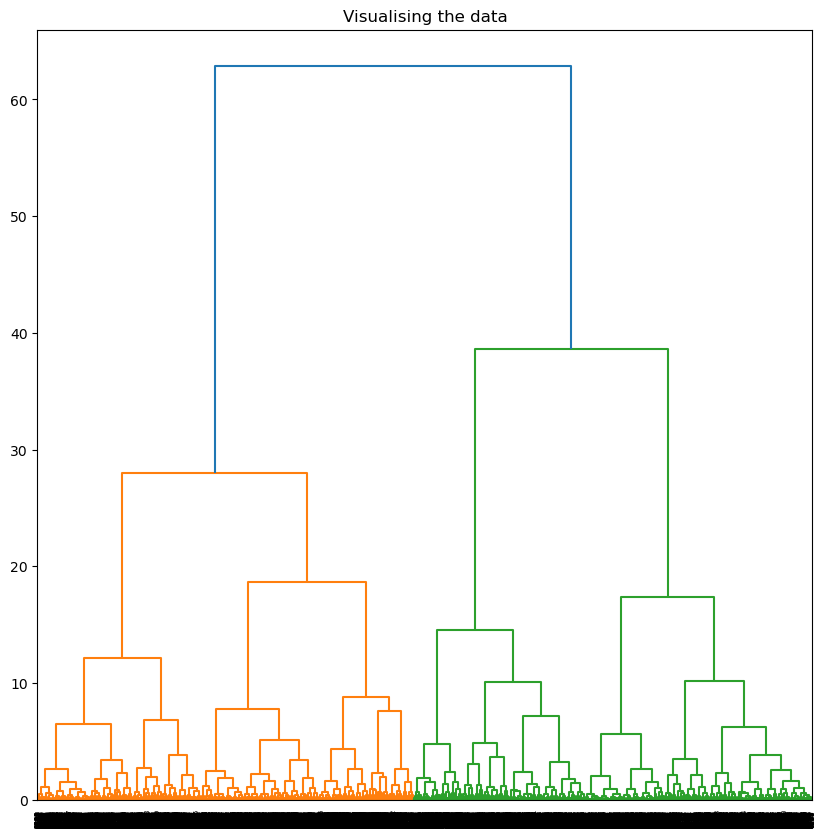

In [29]:
plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principle, method ='ward')))

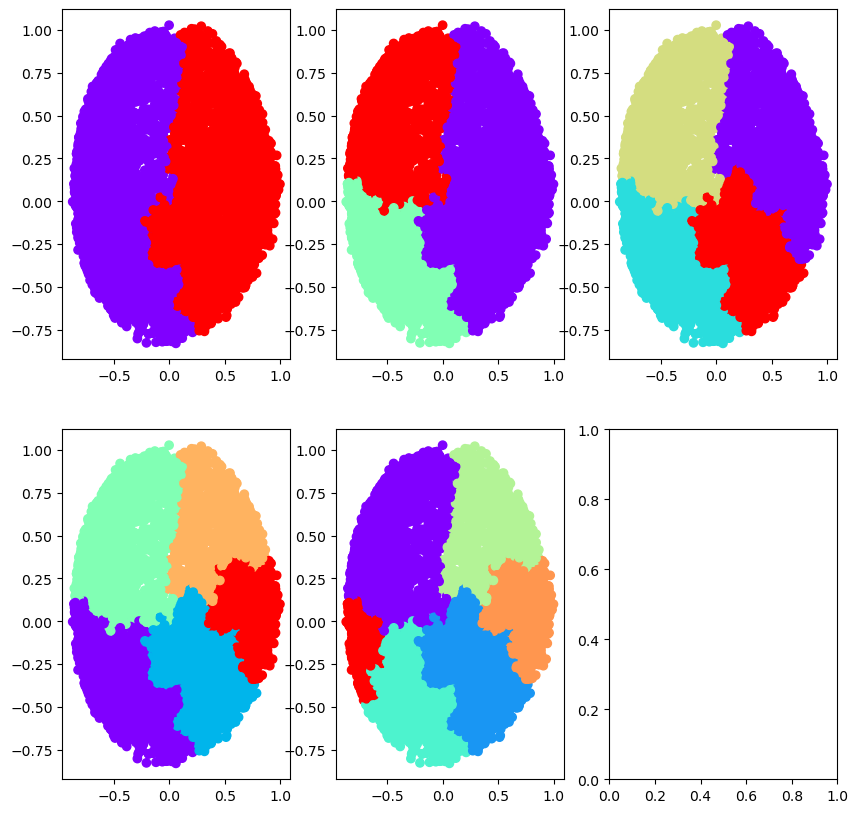

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
rc = 0
cc = 0

agglomeratives = []
c_values = []

for i in range(2, 7):
    if cc >= 3:
        cc = 0
        rc += 1
    
    ac = AgglomerativeClustering(n_clusters = i)
    c = ac.fit_predict(X_principle)
    ax[rc][cc].scatter(X_principle['P1'], X_principle['P2'], 
                c = c, cmap ='rainbow')
    agglomeratives.append(ac)
    c_values.append(c)

    cc += 1

plt.show()

In [26]:
k = [2, 3, 4, 5, 6]
silhouette_scores = [
    silhouette_score(X_principle, c)
    for c in c_values
]
print(silhouette_scores)

[0.4323676827267536, 0.42784478564117223, 0.3746584392060403, 0.3551247042613924, 0.31685879889867713]


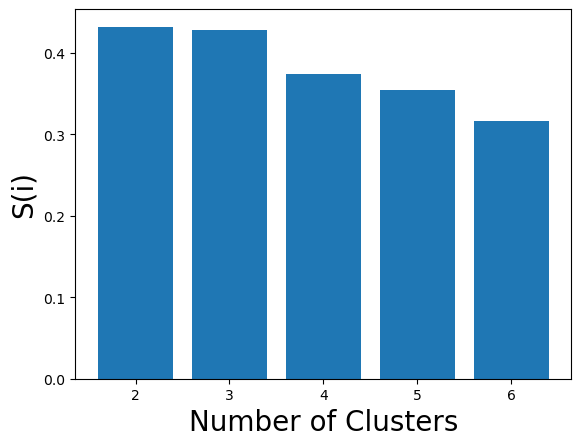

In [27]:
plt.bar(k,silhouette_scores)
plt.xlabel('Number of Clusters', fontsize = 20)
plt.ylabel('S(i)',fontsize = 20)
plt.show()